Text 1 to check: Many people have car where they live. The thing they don't know is that when you use a car alot of thing can happen like you can get in accidet or the smoke that the car has is bad to breath on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban's families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden on the outskirts of freiburd that near the French and Swiss borders. You probaly won't see a car in Vauban's streets because they are completely "car free" but If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states and s

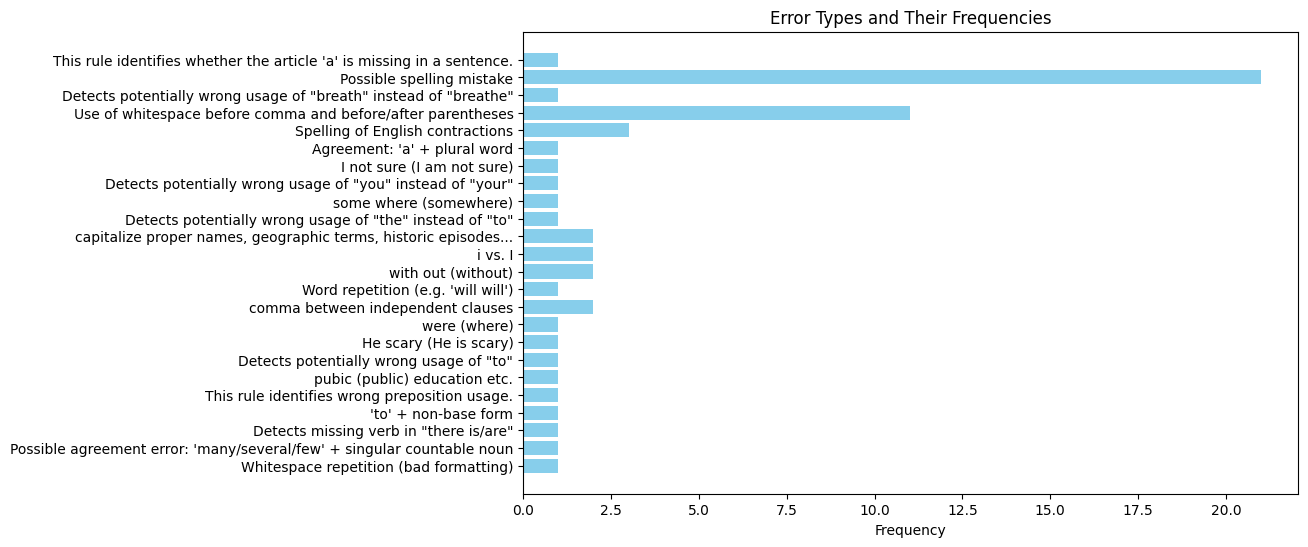

In [31]:
import requests
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

def check_text(text):
    url = "https://languagetool.org/api/v2/check"
    payload = {
        "text": text,
        "language": "en-US"
    }
    response = requests.post(url, data=payload)
    return response.json()

def log_errors(result):
    error_log = defaultdict(int)
    for match in result['matches']:
        if 'rule' in match and match.get('rule').get('description'):
            error_type = match['rule']['description']
            error_log[error_type] += 1
    return error_log

def plot_error_log(error_log):
    error_types = list(error_log.keys())
    frequencies = list(error_log.values())
    
    plt.figure(figsize=(10, 6))
    plt.barh(error_types, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.title('Error Types and Their Frequencies')
    plt.gca().invert_yaxis()  
    plt.show()

df = pd.read_csv('Dataset/train.csv')

error_logs = []


for i in range(min(20, len(df))):
    text_to_check = df['full_text'].values[i]

    print(f"Text {i + 1} to check:", text_to_check)
    
    result = check_text(text_to_check)
    
    
    result_str = json.dumps(result, indent=4)
    print(result_str)
    
    # Log the errors
    error_log = log_errors(result)
    error_logs.append(error_log)

all_error_types = set()
for log in error_logs:
    all_error_types.update(log.keys())

for error_type in all_error_types:
    df[error_type] = 0

for i, error_log in enumerate(error_logs):
    for error_type, frequency in error_log.items():
        df.at[i, error_type] = frequency



   essay_id                                          full_text  score  \
0   000d118  Many people have car where they live. The thin...      3   
1   000fe60  I am a scientist at NASA that is discussing th...      3   
2   001ab80  People always wish they had the same technolog...      4   
3   001bdc0  We all heard about Venus, the planet without a...      4   
4   002ba53  Dear, State Senator\r\n\r\nThis is a letter to...      3   
5   0030e86  If I were to choose between keeping the electo...      4   
6   0033037  The posibilty of a face reconizing computer wo...      2   
7   0033bf4  What is the Seagoing Cowboys progam?\r\n\r\nIt...      3   
8   0036253  The challenge of exploring Venus\r\n\r\nThis s...      2   
9   0040e27  There are many reasons why you should join sea...      3   
10  004229b  I do not think that driverless cars are a good...      2   
11  0047cb3  "It's a good oppurtunity to take away stress a...      2   
12  005a72e  I agree that driverless cars are a dev

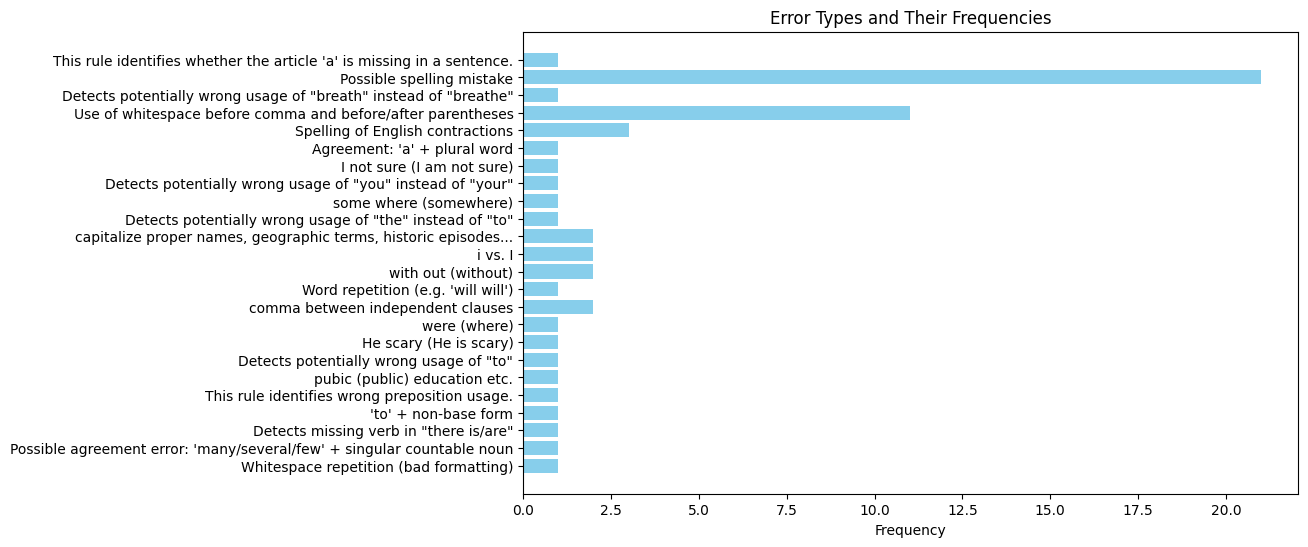

In [32]:
print(df.head(20))

essay_index_to_plot = 0  
plot_error_log(error_logs[essay_index_to_plot])


   essay_id                                          full_text  score  \
0   000d118  Many people have car where they live. The thin...      3   
1   000fe60  I am a scientist at NASA that is discussing th...      3   
2   001ab80  People always wish they had the same technolog...      4   
3   001bdc0  We all heard about Venus, the planet without a...      4   
4   002ba53  Dear, State Senator\r\n\r\nThis is a letter to...      3   
5   0030e86  If I were to choose between keeping the electo...      4   
6   0033037  The posibilty of a face reconizing computer wo...      2   
7   0033bf4  What is the Seagoing Cowboys progam?\r\n\r\nIt...      3   
8   0036253  The challenge of exploring Venus\r\n\r\nThis s...      2   
9   0040e27  There are many reasons why you should join sea...      3   
10  004229b  I do not think that driverless cars are a good...      2   
11  0047cb3  "It's a good oppurtunity to take away stress a...      2   
12  005a72e  I agree that driverless cars are a dev

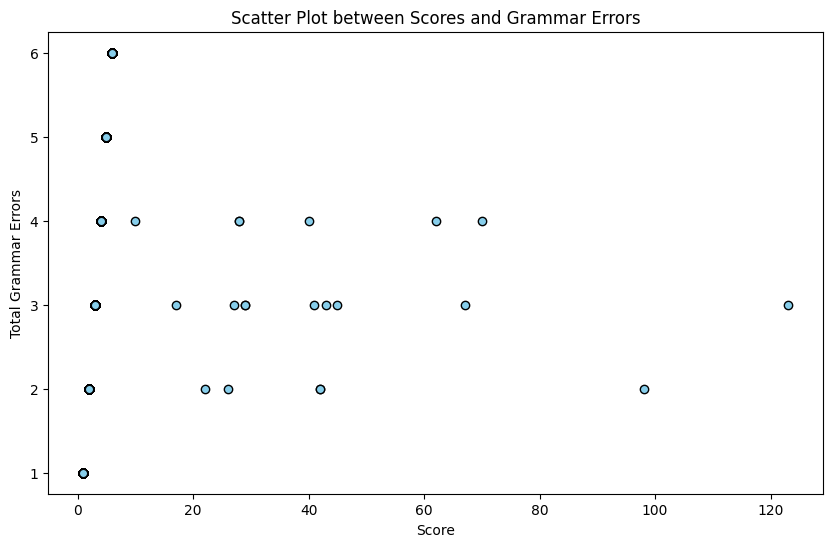

In [36]:
import pandas as pd

df = pd.read_csv('Dataset/train.csv')

error_logs = []

for i in range(min(20, len(df))):
    text_to_check = df['full_text'].values[i]
    
   
    result = check_text(text_to_check)
    
  
    error_log = log_errors(result)
    error_logs.append(error_log)


all_error_types = set()
for log in error_logs:
    all_error_types.update(log.keys())


for error_type in all_error_types:
    df[error_type] = 0

for i, error_log in enumerate(error_logs):
    for error_type, frequency in error_log.items():
        df.at[i, error_type] = frequency


df['total_errors'] = df[list(all_error_types)].sum(axis=1)

print(df.head(20))

import matplotlib.pyplot as plt

df['total_grammar_errors'] = df.iloc[:, 2:].sum(axis=1)  

plt.figure(figsize=(10, 6))
plt.scatter(df['total_grammar_errors'], df['score'] , color='skyblue', edgecolors='black')
plt.xlabel('Score')
plt.ylabel('Total Grammar Errors')
plt.title('Scatter Plot between Scores and Grammar Errors')
plt.show()
